# Machine Learning Group Submission
# Group 9
**Team: **
Dhanuja Tharinda Memmenda Arachchi(21062872),
Omoregbeomwan Nathaniel Olotu (21001551),
Kasuni Anuradha Ranaweera(21088776), 
Omesha Prashanthika Samarakoon(21088775)

In [ ]:
# mounting google drive
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

os.environ['MLDS'] ='/content/drive/MyDrive/MLNN DS'

# upload Group_Project_Data 2.zip 
%cd /content/drive/MyDrive/MLNN DS

Mounted at /content/drive
/content/drive/MyDrive/MLNN DS


In [ ]:
# unzip input file 
# This will execute only the first time
!unzip \*.zip && rm *.zip

Archive:  Group_Project_Data 2.zip
replace __MACOSX/._Group_Project_Data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

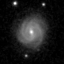

In [ ]:
#view a sample image
import cv2
from google.colab.patches import cv2_imshow
img = "/content/drive/MyDrive/MLNN DS/Group_Project_Data/Train/Real/img_1.png"
image = cv2.imread(img)
cv2_imshow(image)

In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

image_size = 224
labels = ('Real', 'Fake')
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]
                resized_arr = cv2.resize(img_arr, (image_size, image_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)

    return np.array(data, dtype='object')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

train = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MLNN DS/Group_Project_Data/Train/")
valid = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MLNN DS/Group_Project_Data/Valid/")

Found 6000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# Augmenting the image
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_iterator = train.as_numpy_iterator()

In [ ]:
valid_iterator = valid.as_numpy_iterator()

In [ ]:
train_batch = train_iterator.next()

In [ ]:
valid_batch = valid_iterator.next()

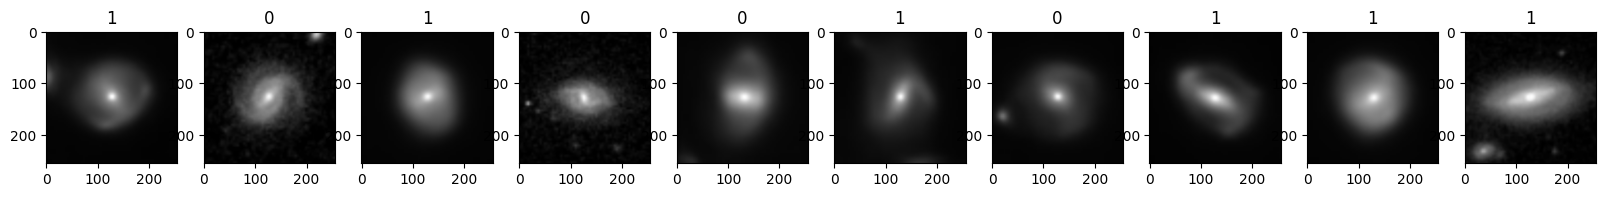

In [ ]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(train_batch[0][10:20]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

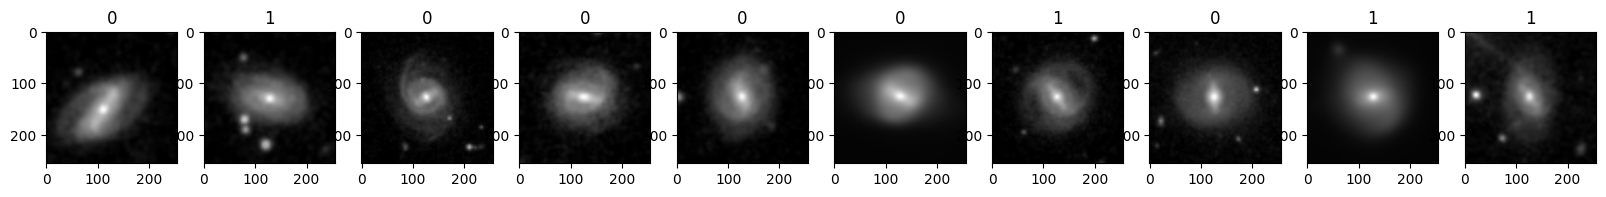

In [ ]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(valid_batch[0][10:20]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(valid_batch[1][idx])

In [ ]:
# Class 0 = Fake images
# Class 1 = Real images



In [ ]:
train = train.map(lambda x,y: (x/255, y))
valid = valid.map(lambda x,y: (x/255, y))

In [ ]:
train.as_numpy_iterator().next()

(array([[[[0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.01176471, 0.01176471, 0.01176471],
          [0.01176471, 0.01176471, 0.01176471],
          [0.01176471, 0.01176471, 0.01176471]],
 
         [[0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.01176471, 0.01176471, 0.01176471],
          [0.01176471, 0.01176471, 0.01176471],
          [0.01176471, 0.01176471, 0.01176471]],
 
         [[0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01568628, 0.01568628, 0.01568628],
          ...,
          [0.01176471, 0.01176471, 0.01176471],
          [0.01176471, 0.01176471, 0.01176471],
          [0.01176471, 0.01176471, 0.01176471]],
 
         ...,
 
         [[0.02303922, 0.02303922, 0.02303922],
          [0.02303

In [ ]:
valid.as_numpy_iterator().next()

(array([[[[0.03529412, 0.03529412, 0.03529412],
          [0.03529412, 0.03529412, 0.03529412],
          [0.03382353, 0.03382353, 0.03382353],
          ...,
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314]],
 
         [[0.03529412, 0.03529412, 0.03529412],
          [0.03529412, 0.03529412, 0.03529412],
          [0.03382353, 0.03382353, 0.03382353],
          ...,
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314]],
 
         [[0.03284314, 0.03284314, 0.03284314],
          [0.03284314, 0.03284314, 0.03284314],
          [0.03161765, 0.03161765, 0.03161765],
          ...,
          [0.0098652 , 0.0098652 , 0.0098652 ],
          [0.00980392, 0.00980392, 0.00980392],
          [0.00980392, 0.00980392, 0.00980392]],
 
         ...,
 
         [[0.01176471, 0.01176471, 0.01176471],
          [0.01176

# Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential() 

In [ ]:
model.add(data_augmentation)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Model Training

In [ ]:
hist = model.fit(train, epochs=12, validation_data=valid, callbacks=[tensorboard_callback])

Epoch 1/12
188/188 [==============================] - 739s 4s/step - loss: 0.1044 - accuracy: 0.9513 - val_loss: 0.0058 - val_accuracy: 0.9985
Epoch 2/12
188/188 [==============================] - 19s 97ms/step - loss: 0.0361 - accuracy: 0.9900 - val_loss: 0.0046 - val_accuracy: 0.9980
Epoch 3/12
188/188 [==============================] - 20s 106ms/step - loss: 0.0038 - accuracy: 0.9985 - val_loss: 0.0107 - val_accuracy: 0.9980
Epoch 4/12
188/188 [==============================] - 19s 98ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0165 - val_accuracy: 0.9965
Epoch 5/12
188/188 [==============================] - 20s 105ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0199 - val_accuracy: 0.9960
Epoch 6/12
188/188 [==============================] - 19s 100ms/step - loss: 0.0013 - accuracy: 0.9993 - val_loss: 0.0069 - val_accuracy: 0.9985
Epoch 7/12
188/188 [==============================] - 19s 98ms/step - loss: 1.4433e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_acc

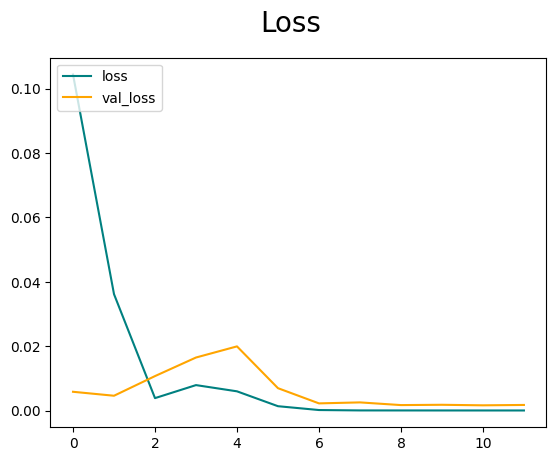

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

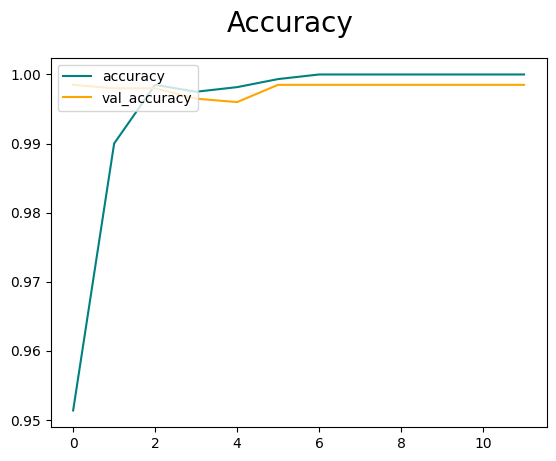

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

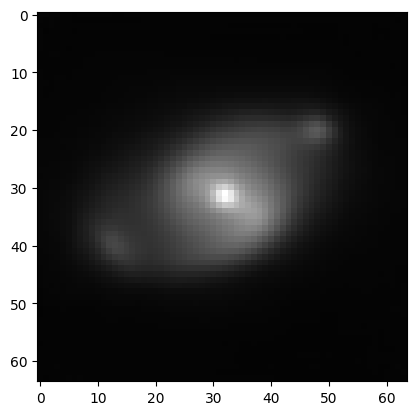

In [ ]:
import cv2
img = cv2.imread("/content/drive/MyDrive/MLNN DS/test/img_9.png")
plt.imshow(img)
plt.show()



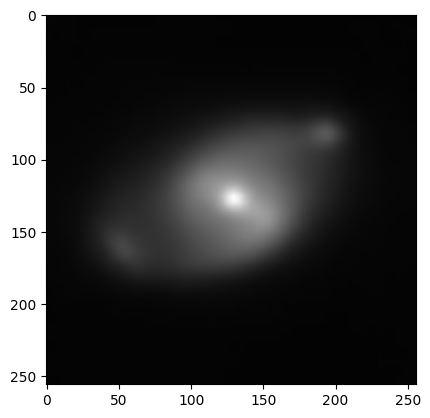

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Prediction

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 209ms/step


array([[6.115584e-07]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Real')
else:
    print(f'Predicted class is Fake')

Predicted class is Fake


In [ ]:
from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix


In [ ]:
from nltk import flatten
truelabel = []
for images, labels in valid:
  truelabel.append(labels.numpy().flatten().tolist())
  truelabel = flatten(truelabel)
print(truelabel)

[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 

In [ ]:
y_pred = model.predict(valid).round().astype('int')

63/63 [==============================] - 5s 79ms/step


<Axes: >

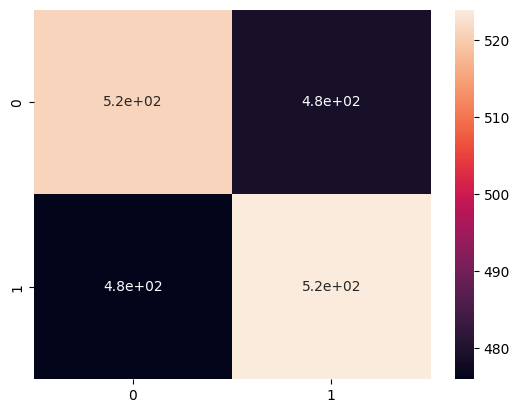

In [ ]:
cm = confusion_matrix(truelabel, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
# Saving your model

model.save('/content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained')

In [ ]:
# Test saved model

loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
# zip the model
!zip -r '/content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained.zip' '/content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained'

  adding: content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained/ (stored 0%)
  adding: content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained/variables/ (stored 0%)
  adding: content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained/variables/variables.data-00000-of-00001 (deflated 23%)
  adding: content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained/variables/variables.index (deflated 63%)
  adding: content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained/assets/ (stored 0%)
  adding: content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained/fingerprint.pb (stored 0%)
  adding: content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained/saved_model.pb (deflated 88%)
  adding: content/drive/MyDrive/MLNN DS/saved model/Group_9_Model_Trained/keras_metadata.pb (deflated 91%)
